# Mini project : Mushroom edibility prediction

## 1. Mushroom Dataset Description

| Variable Name               | Role     | Type        | Description                                                                 | Units | Missing Values |
|----------------------------|----------|-------------|-----------------------------------------------------------------------------|--------|----------------|
| **poisonous**              | Target   | Categorical |                                                                            |        | no             |
| **cap-shape**              | Feature  | Categorical | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s                    |        | no             |
| **cap-surface**            | Feature  | Categorical | fibrous=f, grooves=g, scaly=y, smooth=s                                    |        | no             |
| **cap-color**              | Feature  | Categorical | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y | | no             |
| **bruises**                | Feature  | Categorical | bruises=t, no=f                                                             |        | no             |
| **odor**                   | Feature  | Categorical | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |   | no             |
| **gill-attachment**        | Feature  | Categorical | attached=a, descending=d, free=f, notched=n                                 |        | no             |
| **gill-spacing**           | Feature  | Categorical | close=c, crowded=w, distant=d                                              |        | no             |
| **gill-size**              | Feature  | Categorical | broad=b, narrow=n                                                           |        | no             |
| **gill-color**             | Feature  | Categorical | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y | | no             |
| **stalk-shape**            | Feature  | Categorical | enlarging=e, tapering=t                                                     |        | no             |
| **stalk-root**             | Feature  | Categorical | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?       |        | yes            |
| **stalk-surface-above-ring** | Feature | Categorical | fibrous=f, scaly=y, silky=k, smooth=s                                       |        | no             |
| **stalk-surface-below-ring** | Feature | Categorical | fibrous=f, scaly=y, silky=k, smooth=s                                       |        | no             |
| **stalk-color-above-ring** | Feature  | Categorical | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |     | no             |
| **stalk-color-below-ring** | Feature  | Categorical | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |     | no             |
| **veil-type**              | Feature  | Binary      | partial=p, universal=u                                                      |        | no             |
| **veil-color**             | Feature  | Categorical | brown=n, orange=o, white=w, yellow=y                                        |        | no             |
| **ring-number**            | Feature  | Categorical | none=n, one=o, two=t                                                        |        | no             |
| **ring-type**              | Feature  | Categorical | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z | | no             |
| **spore-print-color**      | Feature  | Categorical | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y | | no             |
| **population**             | Feature  | Categorical | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y     |        | no             |
| **habitat**                | Feature  | Categorical | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d          |        | no             |

Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances


## 2. Data importation and Initial Data Exploration

In [1]:
# Library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder



# utils contains some custom functions
from utils import full_frequency_analysis

# show everything in pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
# restore default settings
# pd.reset_option('all')

In [2]:
columns = [
    "poisonous",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

data = pd.read_csv(
    "mushroom/agaricus-lepiota.data",
    header=None,
    names=columns,
)



data.replace("?", pd.NA, inplace=True)
print("------------------data info----------------")
print(data.info())
print("-------------------Missing Values--------------------------")
print(data.isnull().sum())
print("-------------------Data head--------------------------")
data.head()

------------------data info----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## 3. Data Cleaning

### 3.1 dealing with missing values 
created a new class called `missing` 

In [3]:
data["stalk-root"] = data["stalk-root"].fillna("missing")
print(data["stalk-root"])

0             e
1             c
2             c
3             e
4             e
         ...   
8119    missing
8120    missing
8121    missing
8122    missing
8123    missing
Name: stalk-root, Length: 8124, dtype: object


### 3.2 check for duplicates 

In [4]:
data.duplicated().sum()

np.int64(0)

=> no duplicates moving on

## 4.Exploratory Data Analysis 
we can see that there all data is categorical

### 4.1 Descriptive statistics

In [5]:
print(data.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color stalk-shape  \
count             8124         8124      8124       8124        8124   
unique               2            2         2         12           2   
top                  f            c         b          b           t   
freq              7914         6812      5612       1728        4608   

       stalk-root stalk-surface-above-ring stalk-surface-below-ring  \
count        8124                     8124                     8124   
unique          5                        4                        4   
top             b                        s                        s   
freq         3776       

### Interpretation
| Feature             | Most Common Value  | Percentage/Details          |
|---------------------|--------------------|-----------------------------|
| **poisonous**        | edible ('e')       | 51.8%, poisonous ('p') 48.2%|
| **cap-shape**        | convex ('x')       | 45%, followed by flat ('f') - 38% |
| **cap-surface**      | smooth ('y')       | 40%, followed by scaly ('s') - 31% |
| **cap-color**        | brown ('n')        | 28%, followed by gray-green ('g') |
| **bruises**          | no bruise ('f')    | 58.4%, bruise ('t') 41.6% |
| **odor**             | no odor ('n')      | 43%, followed by foul ('f') - 26% |
| **gill-attachment**  | free gills ('f')   | 97.4%                       |
| **gill-spacing**     | close-set ('c')    | 83.9%                       |
| **stalk-shape**      | tapering ('t')     | 56.7%                       |
| **veil-type**        | partial ('p')      | 100%                        |
| **spore-print-color**| white ('w')        | 29%                         |
| **habitat**          | disturbed ('d')    | 38.7%                       |

### 4.2 Frequency analysis 
see how often each value appears in a dataset, making it easier to spot common trends or rare values.

In [6]:
summary_dict = full_frequency_analysis(data)
summary_dict

{'poisonous':            Frequency  Proportion  Cumulative Proportion
 poisonous                                              
 e               4208    0.517971               0.517971
 p               3916    0.482029               1.000000,
 'cap-shape':            Frequency  Proportion  Cumulative Proportion
 cap-shape                                              
 x               3656    0.450025               0.450025
 f               3152    0.387986               0.838011
 k                828    0.101920               0.939931
 b                452    0.055638               0.995569
 s                 32    0.003939               0.999508
 c                  4    0.000492               1.000000,
 'cap-surface':              Frequency  Proportion  Cumulative Proportion
 cap-surface                                              
 y                 3244    0.399311               0.399311
 s                 2556    0.314623               0.713934
 f                 2320    0.285574  

### Interpretation

- **Edible vs Poisonous**: Balanced distribution.  
- **Cap Shape**: Convex most common.  
- **Cap Surface**: Smooth most common.  
- **Cap Color**: Brown most common.  
- **Bruises**: Majority don’t bruise.  
- **Odor**: No odor most common.  
- **Gills**: Free and close-set most frequent.  
- **Stalk Shape**: Tapering most frequent.  
- **Veil**: Partial veil only.

### Univariate Analaysis

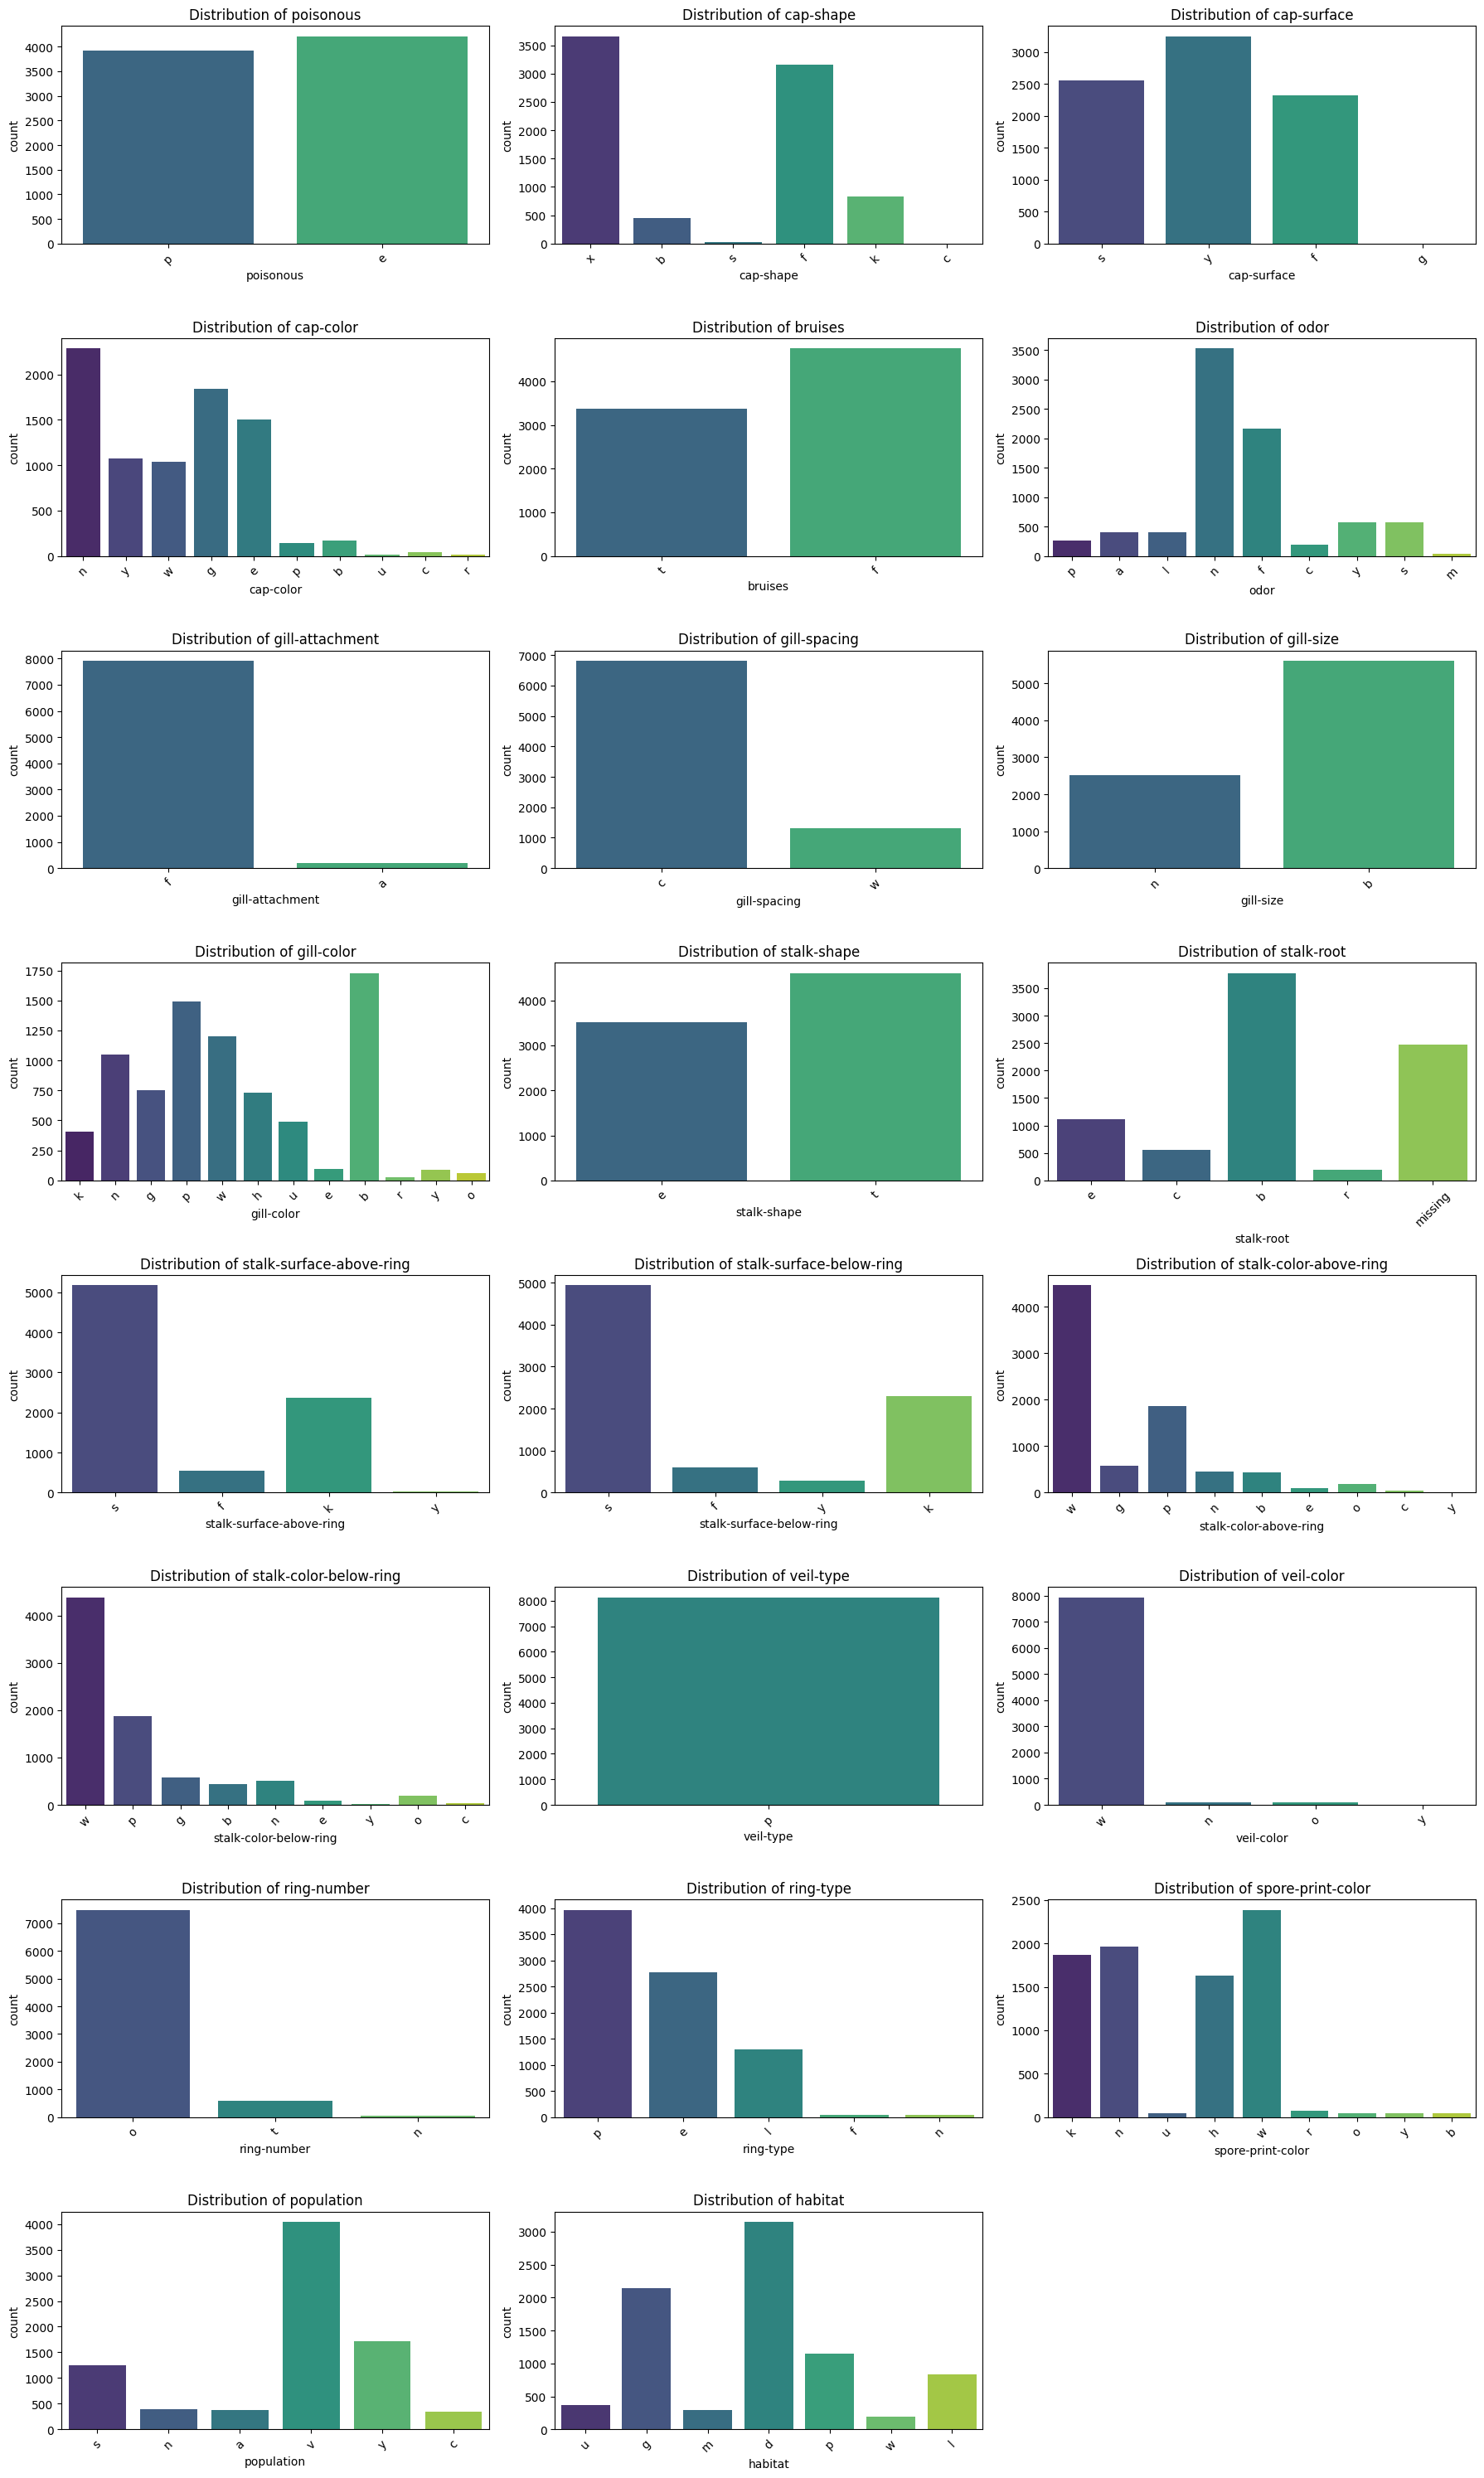

In [7]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(18, 30))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.countplot(x=col, data=data, hue=col, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
# plt.savefig("plots/distributions",dpi=150)
plt.show()

### interpretation
- Veil type shows essentially no variability (single category dominates)
- Gill attachment has almost all samples in a single category
- Ring number is heavily concentrated in one category
- Gill spacing shows strong preference for one category
- Stalk shape appears to have minimal variation across categories

### Bivariate analysis

#### stacked bar plot vs poisonoues

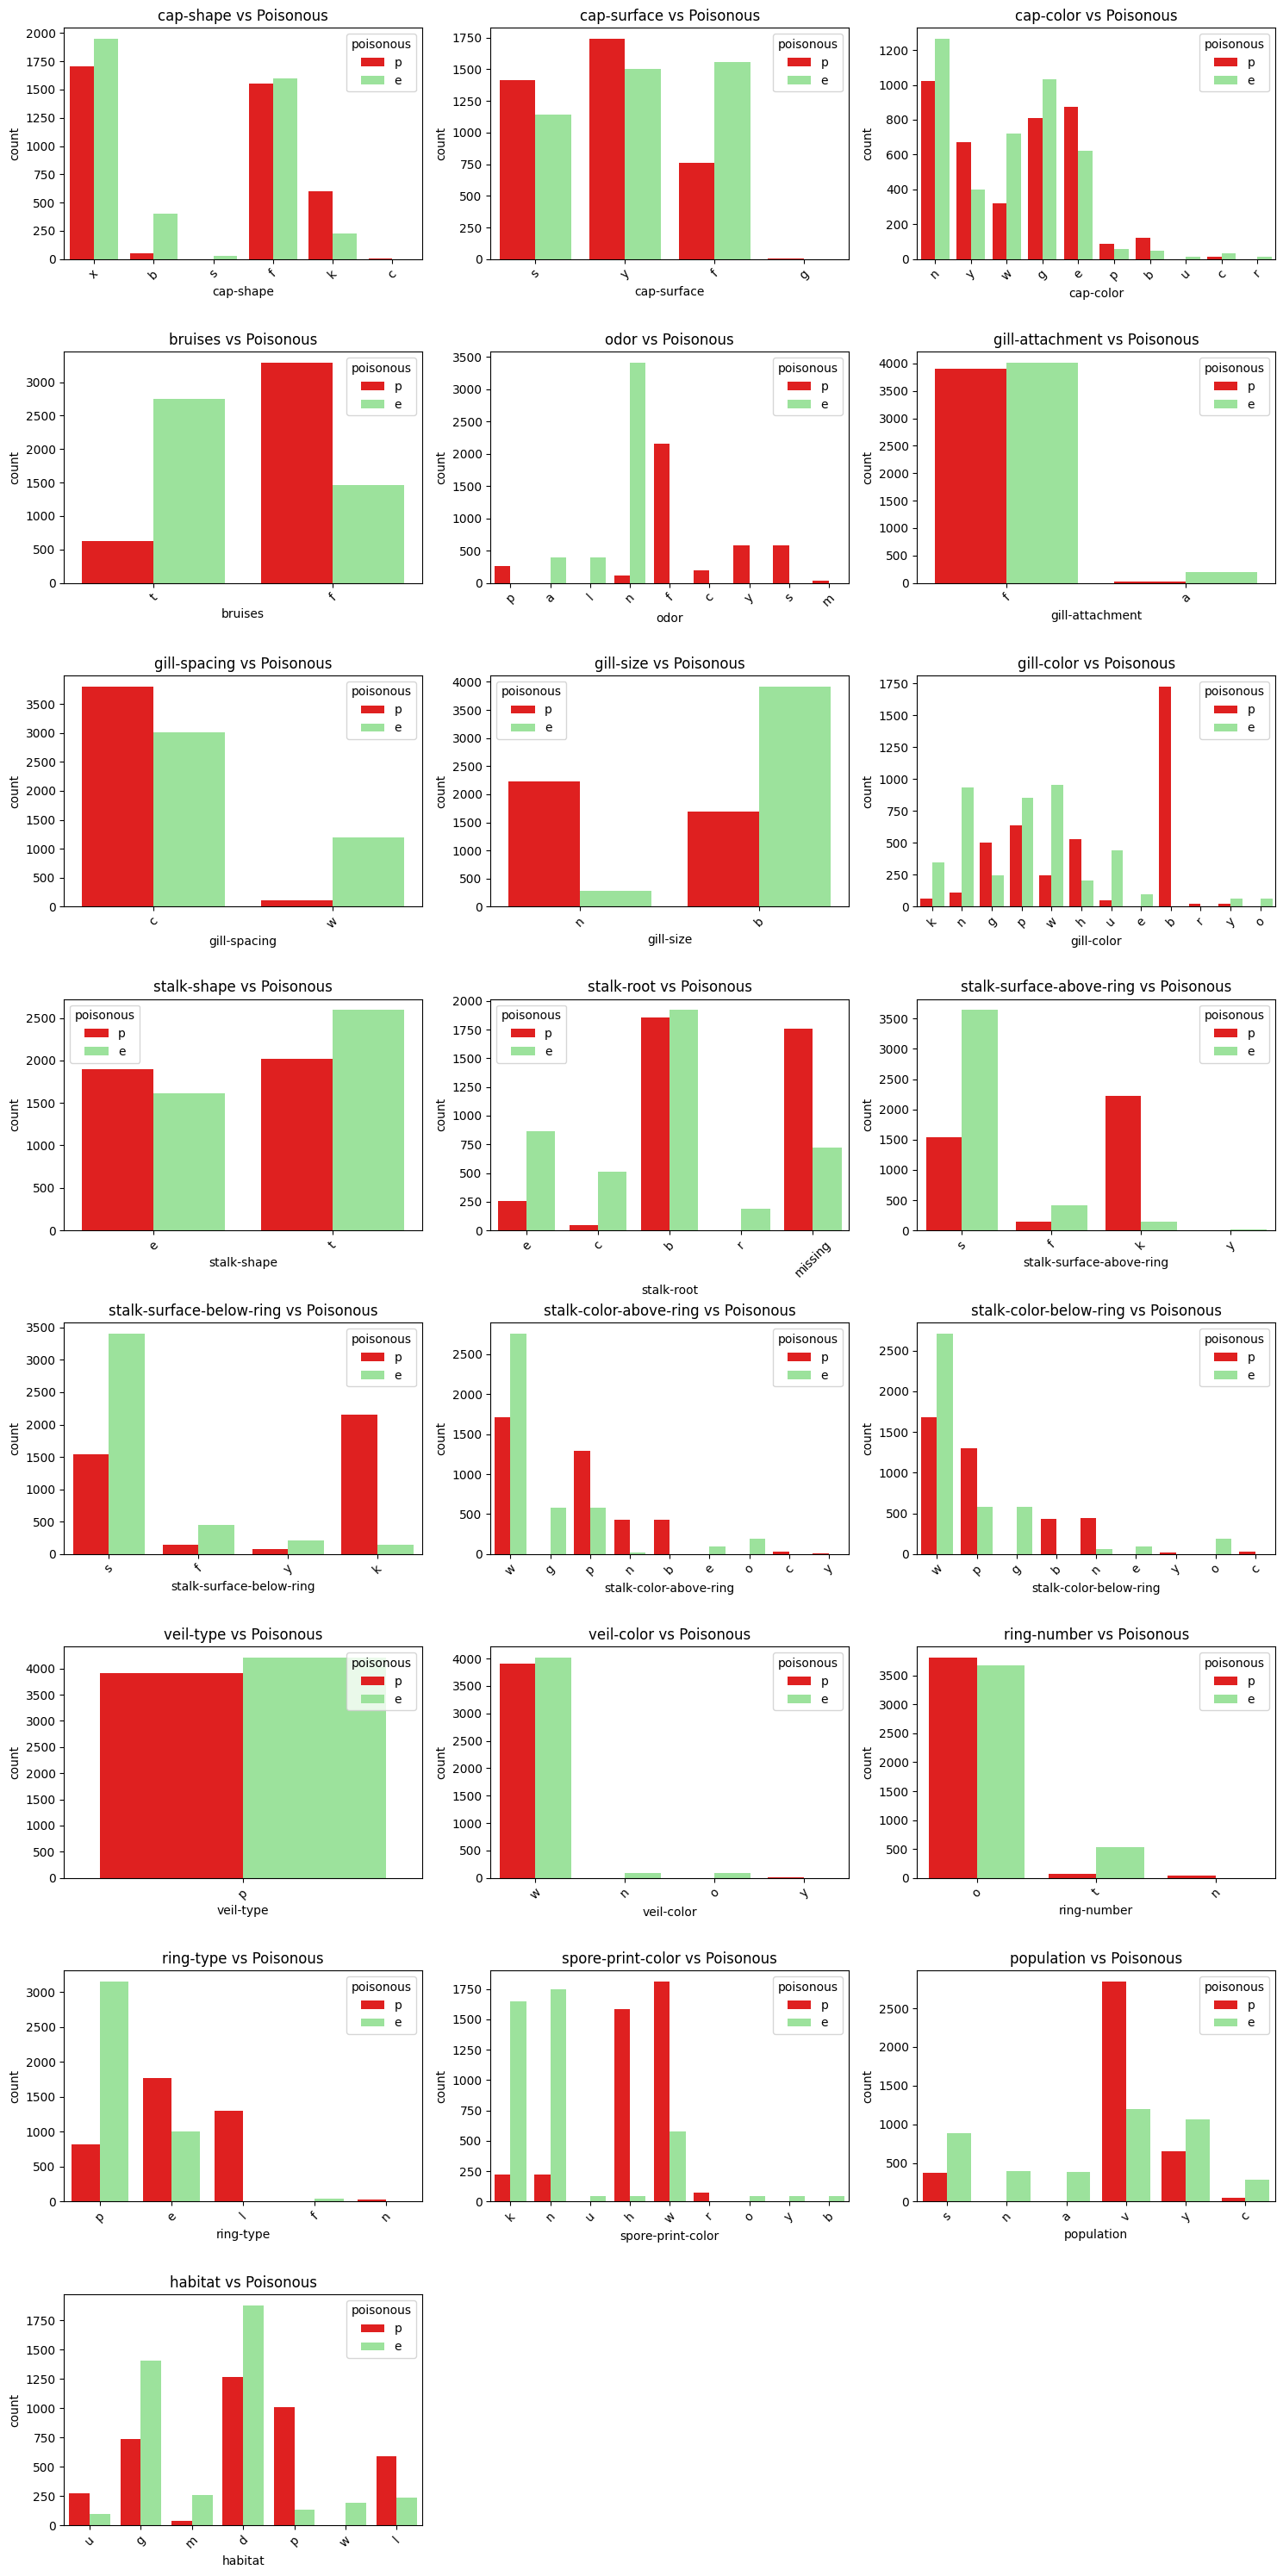

In [8]:
features = data.columns.drop("poisonous")
# Plot settings
plt.figure(figsize=(15, 30))  # Large canvas for multiple plots
axes = axes.flatten()
for i, feature in enumerate(features, 1):
    plt.subplot(8, 3, i)
    sns.countplot(
        data=data, x=feature, hue="poisonous", palette={"e": "lightgreen", "p": "red"}
    )
    plt.title(f"{feature} vs Poisonous")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.4)
# plt.savefig("plots/all_stacked_bar_plots.png", dpi=50)  # Save as image
plt.show()

### interpretation
- we can see that odor actually is the most **distinctive** one
- gill size, and stalk surface characteristics display strong correlations with edibility, offering potential reliable indicators for identifying dangerous mushrooms.RetryClaude can make mistakes. Please double-check responses.


#### Chi-Square Test
- Null Hypothesis (H₀): The variables are unrelated.
- Alternative Hypothesis (H₁): The variables are associated.
- Key Output:
    - Chi-Square Statistic (higher → stronger association).
    - p-value (if < 0.05 → reject H₀; the feature matters).

In [9]:

results = []
# Loop through each feature
for feature in data.columns.drop("poisonous"):
    # Create contingency table
    contingency_table = pd.crosstab(data[feature], data["poisonous"])

    # Run Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append(
        {"Feature": feature, "Chi2": chi2, "p-value": p, "Significant": p < 0.05}
    )

chi2results = pd.DataFrame(results).sort_values("Chi2", ascending=False)
chi2results

,Feature,Chi2,p-value,Significant
4,odor,7659.726740,0.000000e+00,True
19,spore-print-color,4602.033170,0.000000e+00,True
8,gill-color,3765.714086,0.000000e+00,True
18,ring-type,2956.619278,0.000000e+00,True
11,stalk-surface-above-ring,2808.286287,0.000000e+00,True
12,stalk-surface-below-ring,2684.474076,0.000000e+00,True
7,gill-size,2366.834257,0.000000e+00,True
13,stalk-color-above-ring,2237.898496,0.000000e+00,True
14,stalk-color-below-ring,2152.390891,0.000000e+00,True
3,bruises,2041.415647,0.000000e+00,True


### Interpretation
- most significant : odor , spore-print-color , gill-color
- least significant : veil-type , stalk-shape , gill-attachement

## 5. Final cleaning , preprocessing data for modeling
- we'll porceed to remove least significant variables
- seperate inputs from label
- train test split before encoding ( prevent leakage)
- encode data (one hot encoding , label encoding for the target)

In [10]:
#dropped odor to confuse the model a little bit 
to_drop = ["veil-type", "gill-attachment", "stalk-shape", "odor"]
original_data = data.copy()
data = data.drop(columns=to_drop)
data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [11]:
X = data.drop(columns=["poisonous"])  # Features
y = data["poisonous"]  # Target

### split to prevent leakage

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Maintains class distribution
)

### label encoding for target

In [13]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Maintains class distribution
)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
le.classes_

array(['e', 'p'], dtype=object)

### One-Hot Encoding for features (preserving column names)

In [14]:
X_train_encoded = pd.get_dummies(X_train, prefix_sep="_")
X_test_encoded = pd.get_dummies(X_test, prefix_sep="_")

In [15]:
# Ensure test set has same columns as train set
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0  # Add missing columns with 0 values
X_test_encoded = X_test_encoded[X_train_encoded.columns]  # Reorder columns

In [16]:
print(f"Training shape: {X_train_encoded.shape}, Test shape: {X_test_encoded.shape}")

Training shape: (6499, 103), Test shape: (1625, 103)


### Dimensionality reduction using PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# PCA needs to be performed on scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f"Original features: {X_train_encoded.shape[1]}")
print(f"Reduced components: {pca.n_components_}")

Original features: 103
Reduced components: 56


##### TOP pricinpale components 

In [18]:
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train_encoded.columns,
    index=[f"PC_{i+1}" for i in range(pca.n_components_)],
)
pca_components.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_missing,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
PC_1,0.080870,-0.000867,-0.008889,-0.106916,0.012174,0.034537,0.041326,0.005223,0.004234,-0.042553,0.034384,-0.006711,-0.074993,0.014912,-0.029591,0.027144,-0.005684,-0.004304,0.116711,-0.030956,-0.242884,0.242884,-0.085738,0.085738,0.164001,-0.164001,-0.224124,0.008908,-0.030841,-0.038650,0.076537,0.104799,-0.004880,0.029669,0.023474,0.062711,0.091971,-0.010176,0.037312,0.110909,0.098589,-0.190787,0.047932,0.057012,-0.238957,0.197825,-0.007847,0.054501,-0.234657,0.177753,0.026257,-0.084505,-0.012112,0.008707,0.077636,-0.082996,-0.006844,-0.125091,0.144611,-0.007839,-0.084632,-0.012112,0.008970,0.077652,-0.084402,-0.006844,-0.124995,0.147597,-0.017031,-0.004960,-0.004662,0.008164,-0.007839,-0.012112,-0.037374,0.041269,-0.145991,-0.007632,-0.154030,-0.012112,0.254651,-0.004486,-0.118545,0.153326,0.155381,-0.003771,0.037837,0.019039,-0.192004,-0.004670,0.051641,0.005449,0.077484,0.125200,-0.163860,0.019183,0.025339,0.086457,-0.112748,0.089450,-0.136935,0.056372,0.014247
PC_2,-0.041367,-0.012652,0.057673,-0.133326,-0.007154,0.044680,0.132673,-0.008075,-0.171412,0.040306,-0.016709,-0.013224,-0.072445,0.138244,-0.122379,-0.033315,-0.001977,-0.001457,-0.047022,0.141465,-0.039229,0.039229,0.069384,-0.069384,0.184506,-0.184506,-0.179351,-0.062318,0.101066,0.106041,-0.032882,-0.009845,-0.060483,0.095652,-0.007095,0.040361,-0.013591,-0.061455,0.267695,-0.018913,-0.058998,-0.239954,0.011125,-0.019027,0.127574,-0.110513,-0.005173,-0.019397,0.132347,-0.111606,-0.000687,0.149056,-0.013555,-0.061319,0.056776,0.145800,-0.101822,0.019352,-0.133850,-0.017093,0.149904,-0.013555,-0.063030,0.056417,0.128308,-0.101822,0.022124,-0.129908,-0.017499,-0.071725,-0.071436,0.103311,-0.017093,-0.013555,0.085222,-0.084044,-0.215340,-0.003484,0.262214,-0.013555,0.012827,-0.051471,0.248164,0.018068,0.007119,-0.051241,-0.010021,-0.004887,-0.215190,-0.052889,-0.032340,-0.112486,-0.027913,-0.037609,-0.051217,0.181805,0.093083,0.020307,-0.150272,-0.013201,0.025643,-0.011696,-0.083926
PC_3,0.005658,0.004136,0.008840,0.013976,-0.009977,-0.018616,-0.040007,0.000027,-0.061769,0.095780,0.001084,-0.001558,0.079371,-0.043013,0.076887,0.012396,-0.007233,-0.005246,-0.129465,-0.014676,-0.158568,0.158568,0.264259,-0.264259,0.021456,-0.021456,0.001796,0.028256,-0.036480,-0.094548,-0.105621,0.024391,0.115529,-0

#### getting variables from pca

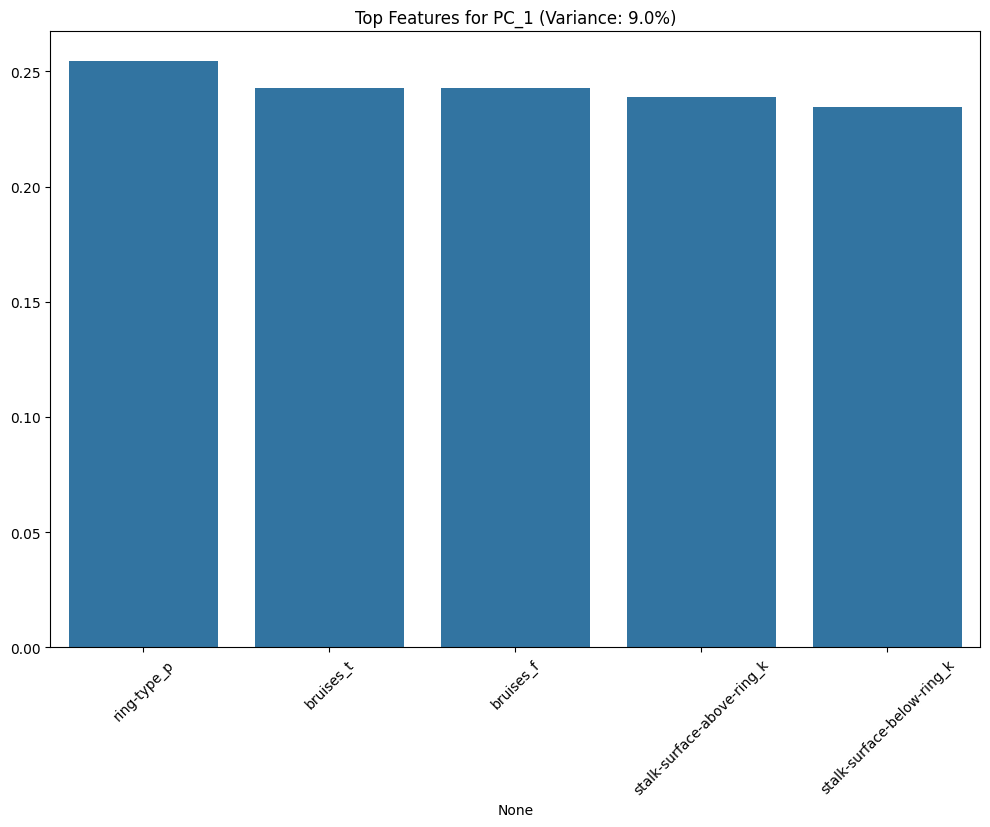

In [19]:
i = 0 #index of the PC that I am going to use
plt.figure(figsize=(12, 8))
top_features = pca_components.iloc[i].abs().sort_values(ascending=False).head(5)
sns.barplot(x=top_features.index, y=top_features.values)
plt.title(
    f"Top Features for PC_{i+1} (Variance: {pca.explained_variance_ratio_[i]:.1%})"
)
plt.xticks(rotation=45)
plt.show()

#### Interpretation
we can see that above variables have top contribution in the first PC 

In the next step we'll select columns based on their **Absolute Loading Sum**

In [20]:
feature_importance = pd.DataFrame(
    {
        "feature": X_train_encoded.columns,
        "importance": np.sum(np.abs(pca.components_), axis=0),
    }
).sort_values("importance", ascending=False)
feature_importance["Cumulative_Importance in %"] = (
    feature_importance["importance"].cumsum() / feature_importance["importance"].sum() * 100
)
feature_importance.reset_index(drop=True).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
feature,cap-color_b,cap-color_p,cap-shape_s,cap-color_c,gill-color_h,gill-color_k,gill-color_u,stalk-color-above-ring_g,gill-color_n,stalk-color-below-ring_g,gill-color_g,spore-print-color_u,gill-color_w,cap-surface_s,cap-color_w,stalk-color-below-ring_y,cap-surface_f,population_n,gill-color_r,cap-shape_b,habitat_p,stalk-color-below-ring_b,cap-color_g,stalk-color-above-ring_p,habitat_m,population_y,stalk-surface-below-ring_f,population_a,cap-surface_y,stalk-color-below-ring_p,cap-shape_c,habitat_l,habitat_d,habitat_u,cap-color_y,stalk-surface-above-ring_y,population_s,cap-surface_g,cap-shape_k,cap-color_e,stalk-surface-above-ring_f,cap-color_n,stalk-color-below-ring_n,population_v,stalk-color-above-ring_b,stalk-color-below-ring_w,cap-shape_f,habitat_g,gill-color_p,stalk-color-above-ring_w,stalk-surface-below-ring_s,stalk-root_r,stalk-surface-below-ring_y,stalk-color-above-ring_n,gill-color_e,gill-color_o,stalk-surface-above-ring_s,stalk-color-above-ring_e,spore-print-color_o,cap-color_r,cap-color_u,gill-color_y,stalk-color-below-ring_e,cap-shape_x,spore-print-color_b,spore-print-color_y,stalk-root_e,spore-print-color_r,veil-color_n,veil-color_o,stalk-surface-below-ring_k,ring-number_t,gill-spacing_c,gill-spacing_w,stalk-surface-above-ring_k,ring-number_o,veil-color_y,stalk-color-above-ring_y,stalk-root_c,ring-type_f,gill-size_n,gill-size_b,spore-print-color_k,stalk-root_b,spore-print-color_n,ring-type_e,bruises_t,bruises_f,population_c,ring-type_p,spore-print-color_h,gill-color_b,spore-print-color_w,stalk-root_missing,habitat_w,ring-type_n,ring-number_n,stalk-color-below-ring_c,stalk-color-above-ring_c,ring-type_l,stalk-color-below-ring_o,stalk-color-above-ring_o,veil-color_w
importance,5.561917,5.288033,5.255669,5.21831,5.169645,5.166573,5.094203,5.069999,5.052864,5.00973,4.995247,4.730795,4.718547,4.708001,4.657237,4.630053,4.586133,4.523738,4.494013,4.466294,4.407811,4.400248,4.314859,4.308096,4.300471,4.289722,4.261856,4.253831,4.220865,4.20342,4.197308,4.162278,4.148705,4.145908,4.139333,4.136587,4.134497,4.127434,4.121101,4.110427,4.063197,4.024727,3.91588,3.913836,3.900981,3.877849,3.87561,3.846094,3.839537,3.83321,3.662464,3.649531,3.585387,3.492833,3.401313,3.360806,3.327757,3.300044,3.275804,3.245943,3.207504,3.179998,3.178877,3.130953,3.036499,2.974902,2.903811,2.889766,2.781045,2.75005,2.695015,2.65598,2.651407,2.651407,2.605298,2.598892,2.573345,2.573345,2.566408,2.412744,2.383321,2.383321,2.354893,2.206064,2.172852,2.144601,2.101223,2.101223,2.000742,1.95997,1.926375,1.916104,1.843357,1.829862,1.793439,1.584117,1.584117,1.584117,1.584117,1.581185,1.325818,1.325818,1.300837
Cumulative_Importance in %,1.565946,3.054781,4.534504,6.003709,7.459212,8.91385,10.348112,11.77556,13.198184,14.608663,16.015064,17.34701,18.675507,20.001035,21.312271,22.615853,23.907069,25.180718,26.445999,27.703474,28.944485,30.183365,31.398205,32.611141,33.82193,35.029692,36.229609,37.427266,38.615642,39.799106,40.98085,42.152731,43.32079,44.488062,45.653483,46.81813,47.982189,49.14426,50.304548,51.46183,52.605815,53.738969,54.841477,55.943409,57.041723,58.133523,59.224693,60.307553,61.388567,62.467799,63.498959,64.526477,65.535935,66.519335,67.476968,68.423196,69.360119,70.28924,71.211536,72.125424,73.02849,73.923812,74.818818,75.700332,76.555252,77.39283,78.210392,79.024,79.806997,80.581268,81.340044,82.08783,82.834328,83.580826,84.314343,85.046055,85.770575,86.495095,87.217662,87.896965,88.567984,89.239004,89.902019,90.523132,91.134894,91.738702,92.330297,92.921892,93.485196,94.037022,94.579389,95.118864,95.637858,96.153052,96.657991,97.103995,97.55,97.996005,98.44201,98.887189,99.260471,99.633752,100.0


### Interpretation
#### the importance
the importance of a variable is the sum of absolute value of columns in `pca.n_components_` 
it is a metric to 'quantiify' how much each variable contributes in the overall variation of data 

### we kept columns with cumulative importance if 80% around 69 feature

In [21]:
top_features = feature_importance[
    feature_importance["Cumulative_Importance in %"] <= 80
]
features_tokeep = top_features["feature"].tolist()
print("number of features to keep: " + str(len(features_tokeep)))
features_tokeep

number of features to keep: 69


['cap-color_b',
 'cap-color_p',
 'cap-shape_s',
 'cap-color_c',
 'gill-color_h',
 'gill-color_k',
 'gill-color_u',
 'stalk-color-above-ring_g',
 'gill-color_n',
 'stalk-color-below-ring_g',
 'gill-color_g',
 'spore-print-color_u',
 'gill-color_w',
 'cap-surface_s',
 'cap-color_w',
 'stalk-color-below-ring_y',
 'cap-surface_f',
 'population_n',
 'gill-color_r',
 'cap-shape_b',
 'habitat_p',
 'stalk-color-below-ring_b',
 'cap-color_g',
 'stalk-color-above-ring_p',
 'habitat_m',
 'population_y',
 'stalk-surface-below-ring_f',
 'population_a',
 'cap-surface_y',
 'stalk-color-below-ring_p',
 'cap-shape_c',
 'habitat_l',
 'habitat_d',
 'habitat_u',
 'cap-color_y',
 'stalk-surface-above-ring_y',
 'population_s',
 'cap-surface_g',
 'cap-shape_k',
 'cap-color_e',
 'stalk-surface-above-ring_f',
 'cap-color_n',
 'stalk-color-below-ring_n',
 'population_v',
 'stalk-color-above-ring_b',
 'stalk-color-below-ring_w',
 'cap-shape_f',
 'habitat_g',
 'gill-color_p',
 'stalk-color-above-ring_w',
 'stalk-

### the New Train and Test 

In [22]:
X_train_reduced = X_train_encoded[features_tokeep]
X_test_reduced = X_test_encoded[features_tokeep]

In [23]:
print(
    f"New Training shape: {X_train_reduced.shape}, New Test shape: {X_test_reduced.shape}"
)

New Training shape: (6499, 69), New Test shape: (1625, 69)


In [24]:
import pandas as pd
import numpy as np

# Assuming these are numpy arrays
# If they are not, you can convert them to numpy arrays first

# Stack the datasets
X = np.vstack([X_train_reduced, X_test_reduced])  # Stack features vertically
y = np.concatenate([y_train_encoded, y_test_encoded])  # Stack labels

# Combine into one DataFrame
combined = pd.DataFrame(X, columns=features_tokeep)
combined['target'] = y  # Add the target column


# Save to CSV
combined.to_csv('mushroom/full_dataset.csv', index=False)


with data reduced we can proceed to modeling 

## 7. Modeling
for modeling the plan is like this
- kNN
- Decision Tree

### Additional if there is time
- Neural network using `pytorch` ( binaryCE as loss function + AdamW (Adam + Weight Decay) as optimizer) 

## 7.1 KNN
- grid search
- cross validation
- les distances: Jaccard ,Hamming , chebyshev , Manhattan

In [25]:

# Set up KNN classifier
knn = KNeighborsClassifier()

# Define parameters to test
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": [ "hamming", "chebyshev",'manhattan'],
}

# Run grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Train the model
grid_search.fit(X_train_reduced, y_train_encoded)

# Show best results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Test the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_reduced)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(
    "\nClassification Report:\n",
    classification_report(y_test_encoded, y_pred, target_names=le.classes_),
)

Best Parameters: {'metric': 'hamming', 'n_neighbors': 9, 'weights': 'uniform'}
Best CV Score: 0.9863052051874222
Test Accuracy: 0.9858461538461538

Classification Report:
               precision    recall  f1-score   support

           e       0.98      0.99      0.99       842
           p       0.99      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



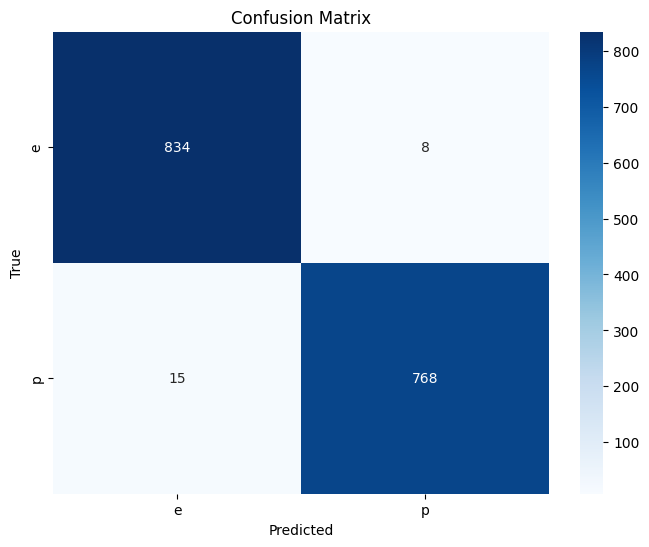

In [26]:

# Create confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

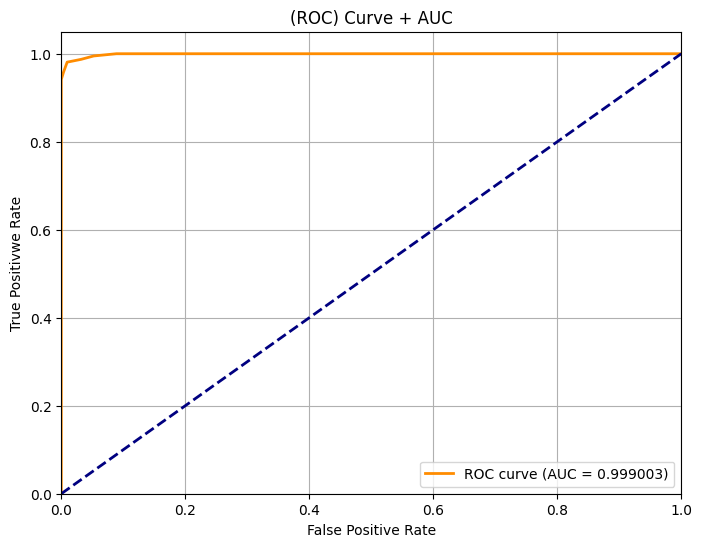

In [27]:
#ROC and AUC Calculation
# Get predicted probabilities for the positive class
y_prob = best_knn.predict_proba(X_test_reduced)[:, 1]  # Probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.6f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivwe Rate')
plt.title('(ROC) Curve + AUC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 7.2 Decision Tree 
- Pre-pruning with GridSearchCV
- Post-pruning with Cost Complexity Pruning


#### pre pruning

In [28]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Run grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train_encoded)

# Best pre-pruning parameters
print("Best Pre-pruning Parameters:", grid_search.best_params_)
print("Best CV Score (Pre-pruning):", grid_search.best_score_)

# Get the best pre-pruned tree
best_prepruned_dt = grid_search.best_estimator_




Best Pre-pruning Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score (Pre-pruning): 0.990306389530408


#### post pruning

In [29]:
# Post-pruning: Compute the cost complexity pruning path
path = best_prepruned_dt.cost_complexity_pruning_path(X_train_reduced, y_train_encoded)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42,
        ccp_alpha=ccp_alpha,
        **{k: v for k, v in grid_search.best_params_.items() if k != 'criterion'},
        criterion=grid_search.best_params_['criterion']
    )
    clf.fit(X_train_reduced, y_train_encoded)
    clfs.append(clf)
    train_scores.append(clf.score(X_train_reduced, y_train_encoded))
    test_scores.append(clf.score(X_test_reduced, y_test_encoded))

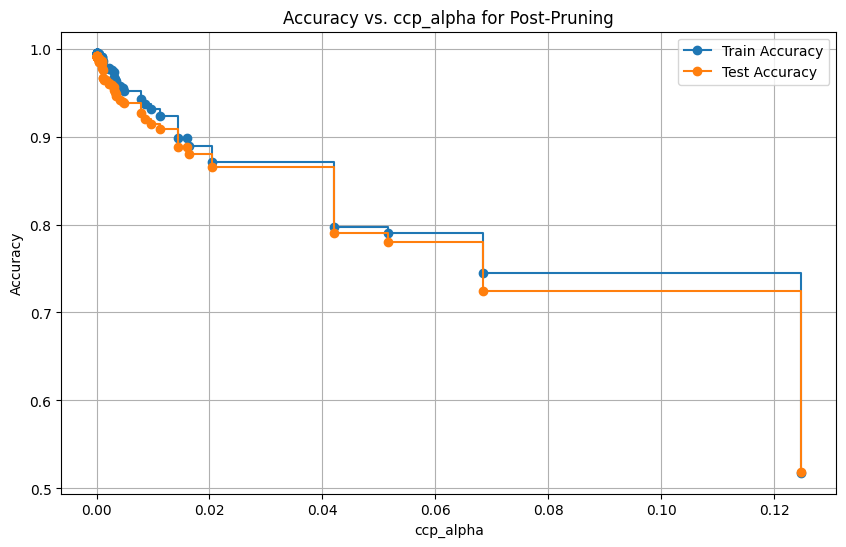

In [30]:
# Plot the pruning curve (accuracy vs ccp_alpha)
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha for Post-Pruning')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
best_ccp_alpha = ccp_alphas[np.argmax(test_scores)]
print("Best ccp_alpha:", best_ccp_alpha)
print("Best Test Accuracy from Pruning Curve:", max(test_scores))

Best ccp_alpha: 3.517024597190772e-05
Best Test Accuracy from Pruning Curve: 0.992


#### final decision tree  
- 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10
- Best ccp_alpha: 3.517024597190772e-05

Final Model Test Accuracy: 0.992

Classification Report:
               precision    recall  f1-score   support

           e       0.99      1.00      0.99       842
           p       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



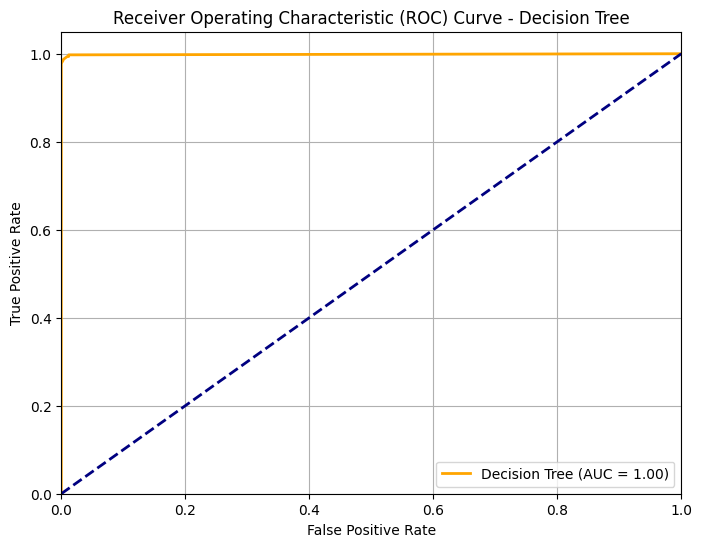

AUC Score: 0.9985855910788339


In [32]:
final_dt = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_ccp_alpha,
    **{k: v for k, v in grid_search.best_params_.items() if k != 'criterion'},
    criterion=grid_search.best_params_['criterion']
)
final_dt.fit(X_train_reduced, y_train_encoded)
# Evaluate the final model
y_pred = final_dt.predict(X_test_reduced)
print("Final Model Test Accuracy:", accuracy_score(y_test_encoded, y_pred))

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=le.classes_))
y_prob_dt = final_dt.predict_proba(X_test_reduced)[:, 1]  # Probability for the positive class

fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc_dt)

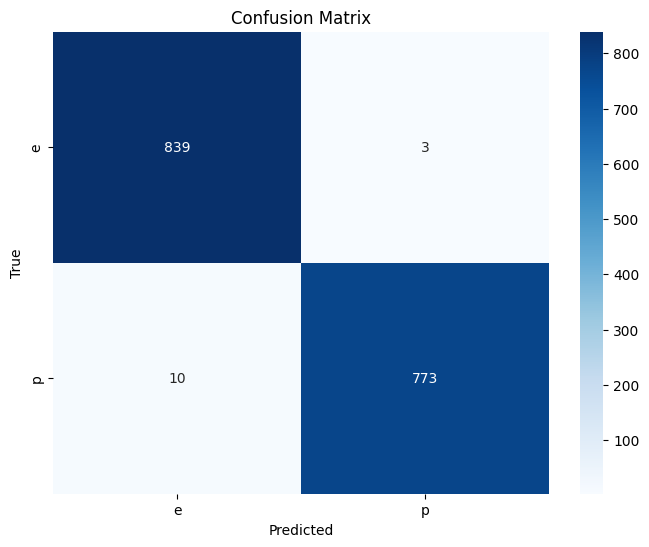

In [33]:
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

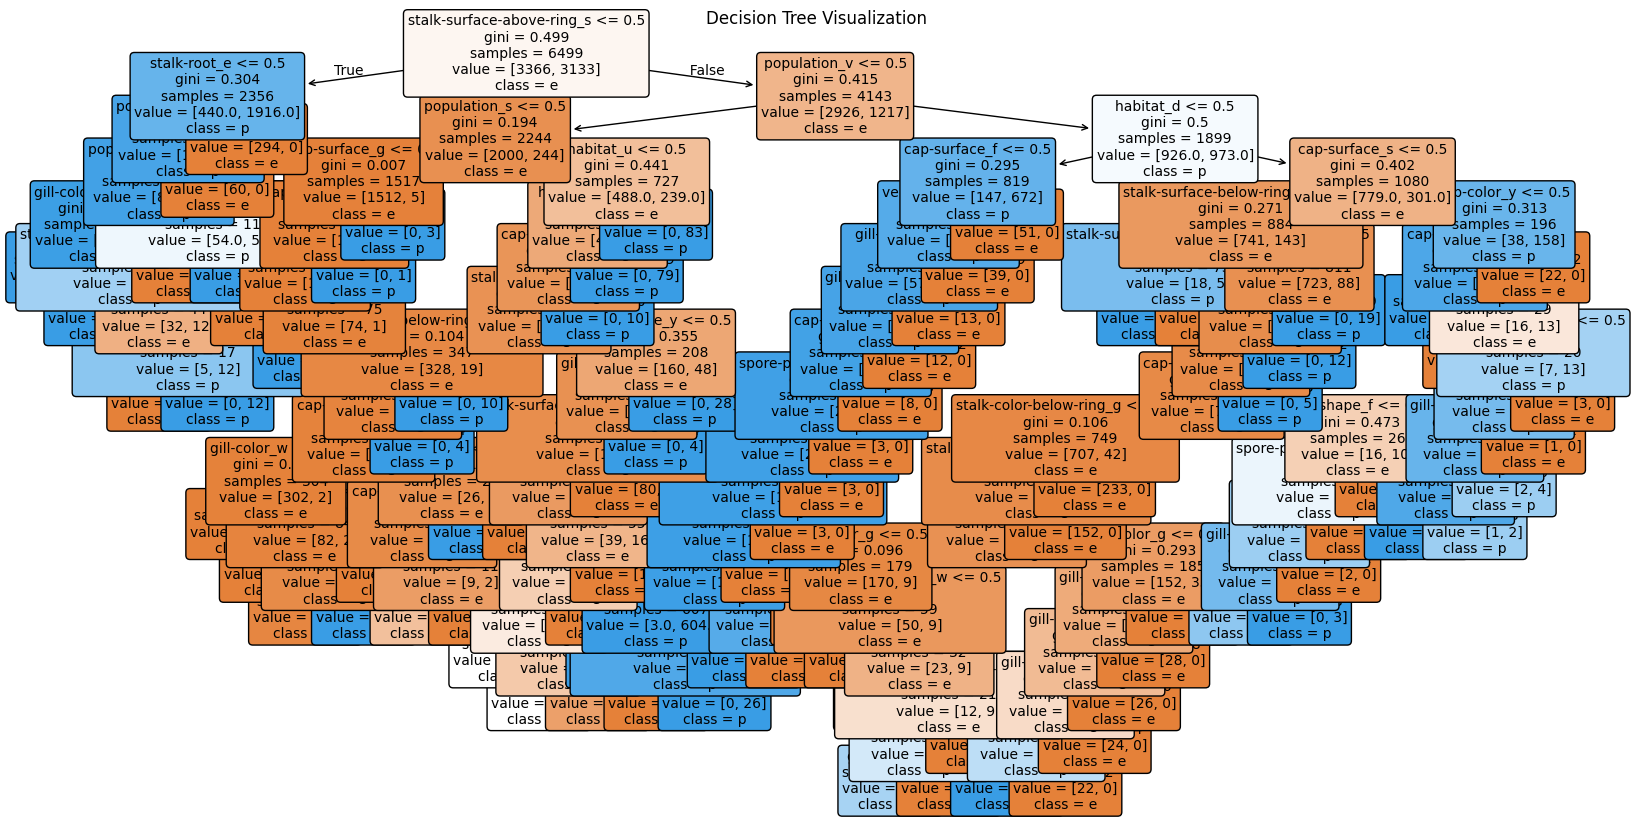

In [34]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    final_dt,
    feature_names=X_train_reduced.columns if hasattr(X_train_reduced, 'columns') else [f'Feature {i}' for i in range(X_train_reduced.shape[1])],
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()

the given tree is so complex to read so we're going to retrain a model with max depth of 3 to visualize masjor decisions for readibility 

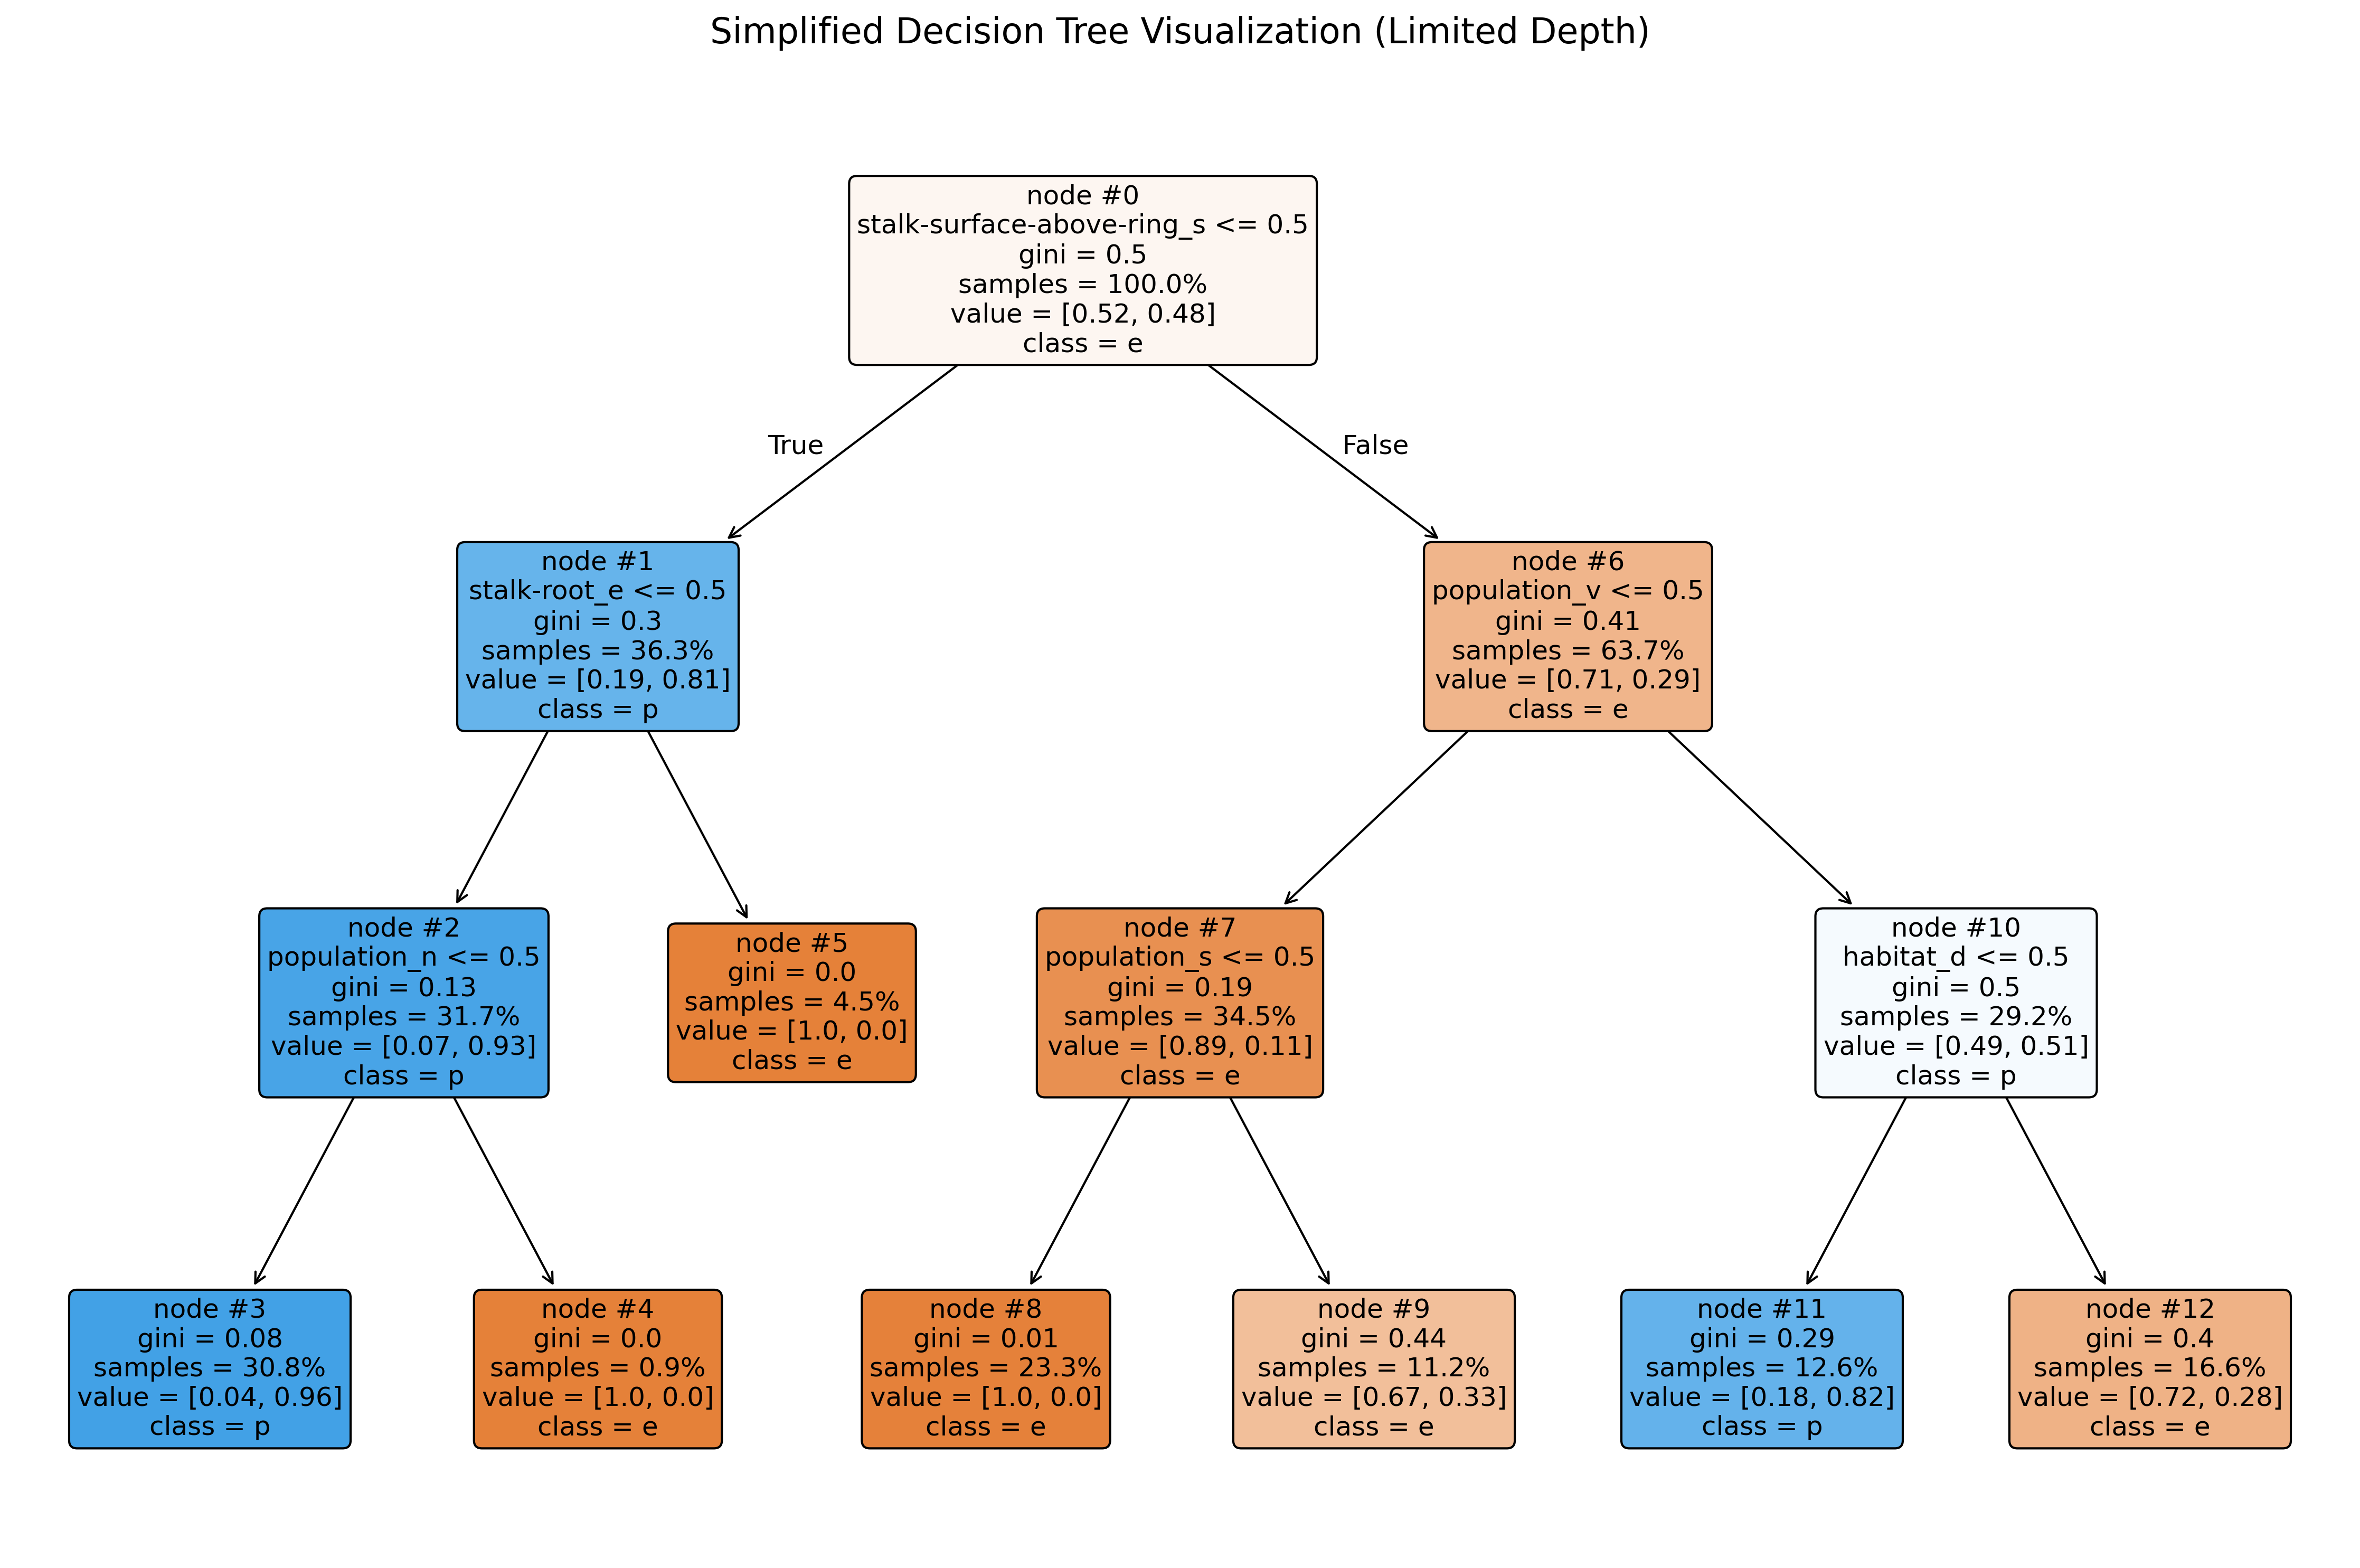

In [35]:
viz_dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Limit depth for better readability
    ccp_alpha=best_ccp_alpha,
    **{k: v for k, v in grid_search.best_params_.items() if k != 'criterion' and k != 'max_depth'},
    criterion=grid_search.best_params_['criterion']
)
viz_dt.fit(X_train_reduced, y_train_encoded)
plt.figure(figsize=(15, 10), dpi=300)  # High resolution for clarity
plot_tree(
    viz_dt,
    feature_names=X_train_reduced.columns if hasattr(X_train_reduced, 'columns') else [f'Feature {i}' for i in range(X_train_reduced.shape[1])],
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=12,  # Larger font for readability
    proportion=True,  
    precision=2, 
    impurity=True, 
    node_ids=True,  
    max_depth=3 
)
plt.title('Simplified Decision Tree Visualization (Limited Depth)', fontsize=16, pad=20)
plt.tight_layout()

plt.savefig('plots/decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

## 8 Comparing KNN and decision Tree 
- Accuracy and AUC
- Confusion Matrix
- Classification Report

| Metric               | KNN               | Decision Tree     |
|----------------------|-------------------|-------------------|
| **Test Accuracy**    | 98.2%             | 99.2%             |
| **AUC**              | ~0.99             | 0.9986            |
| **Confusion Matrix** | FP=8, FN=14       | FP=2, FN=1        |
| **Precision (Poisonous)** | 0.99         | 1.00              |
| **Recall (Poisonous)**    | 0.98         | 0.99              |

### Pipeline
#### Preprocesssing sum up 
- for missing data we addedd `missing` class
- Label encoding for target
- One hot encoding for input
- Features to keep after encoding are stored in `features_tokeep`
#### Models
- Knn best parameters : Best Parameters: {'metric': 'hamming', 'n_neighbors': 9, 'weights': 'uniform'}
- Decision tree best parameters :
    -  'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10
    -  Best ccp_alpha: 3.517024597190772e-05

#### Post Training evaluation :
- accuracy and auc and roc
- Classification Report
- confusion matrix

In [36]:
#Importing necessary libraries
import importlib

from utils import GetDummiesTransformer , FeatureSelector #defined in utils.py
from sklearn.pipeline import Pipeline


### Creating the pipelines

In [37]:
features_afterdrop = list(set(features)-(set(['odor', 'gill-attachment', 'stalk-shape', 'veil-type'])))

print(features_afterdrop)
preprocessor = Pipeline([
    ('get_dummies', GetDummiesTransformer(columns=features_afterdrop))
])
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', FeatureSelector(features_tokeep)),
    ('classifier', KNeighborsClassifier(metric='hamming', n_neighbors=9, weights='uniform'))
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', FeatureSelector(features_tokeep)),
    ('classifier', DecisionTreeClassifier(
        criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=10,
        ccp_alpha=3.517024597190772e-05, random_state=42
    ))
])

['stalk-color-above-ring', 'population', 'bruises', 'cap-shape', 'spore-print-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'cap-surface', 'habitat', 'ring-number', 'gill-color', 'veil-color', 'gill-spacing', 'stalk-color-below-ring', 'gill-size', 'cap-color']


In [38]:
X = data.drop(columns=["poisonous"])  # Features
y = data["poisonous"]  # Target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Maintains class distribution
)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("X_train shape:", X_train.shape)
pd.DataFrame(X_test).head()

X_train shape: (6499, 18)


,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4632,x,y,g,f,c,b,p,b,k,k,p,n,w,o,l,h,y,d
3444,x,s,w,f,c,n,u,b,s,s,w,w,w,o,p,n,s,d
1209,x,f,w,f,w,b,p,e,s,s,w,w,w,o,e,n,s,g
6880,f,s,e,f,c,n,b,missing,k,s,w,w,w,o,e,w,v,p
4542,x,f,y,f,c,b,g,b,k,k,p,n,w,o,l,h,y,g


### simple function to automate pipeline fitting and eevaluation

In [39]:
from sklearn import set_config

def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name):
    # Fit the pipeline
    pipeline.fit(X_train, y_train_encoded)
    # Predict
    
   
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    
    # Classification Report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=le.classes_, yticklabels=le.classes_
    )
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

(6499, 103)
KNN Test Accuracy: 0.9920

KNN Classification Report:

              precision    recall  f1-score   support

           e       0.99      1.00      0.99       842
           p       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



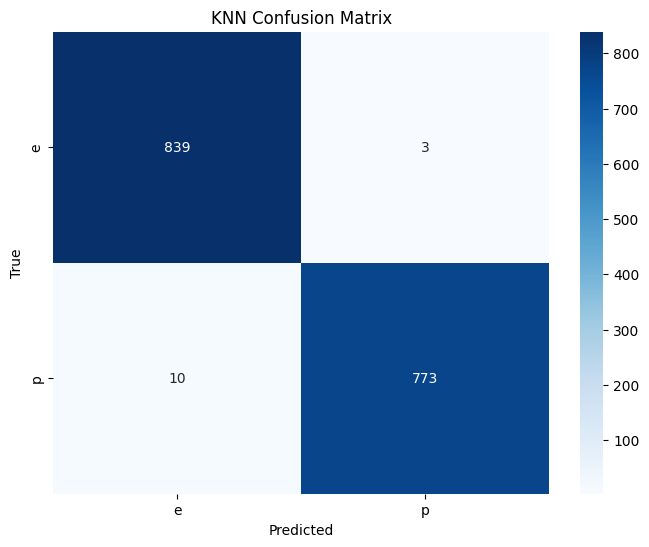

(6499, 103)
Decision Tree Test Accuracy: 0.9920

Decision Tree Classification Report:

              precision    recall  f1-score   support

           e       0.99      1.00      0.99       842
           p       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



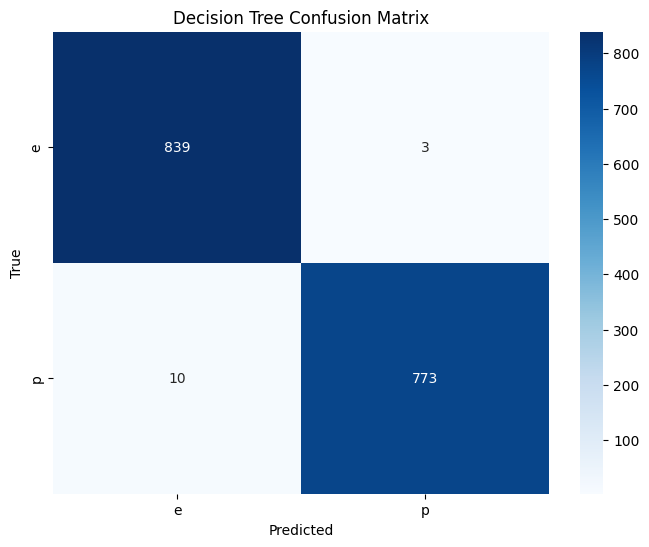

In [40]:
set_config(enable_metadata_routing=True)
evaluate_model(knn_pipeline, X_train, X_test, y_train_encoded, y_test_encoded, "KNN")
evaluate_model(dt_pipeline, X_train, X_test, y_train_encoded, y_test_encoded, "Decision Tree")